<a href="https://colab.research.google.com/github/Marglodis/challenge_telecomX_parte_2/blob/main/challenge_telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests


In [78]:
url_data = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

df_original = pd.read_json(url_data)

In [91]:
data_cleaned = pd.read_csv('/content/df_clean.csv') # data limpia del challenge anterior
data_cleaned.info()
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [92]:
from sklearn.preprocessing import LabelEncoder

# Mapear Churn a binario
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])  # Yes -> 1, No -> 0

# Codificar variables binarias
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])  # e.g., Female -> 0, Male -> 1

# One-hot encoding para variables multicategoría
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

KeyError: "None of [Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',\n       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',\n       'Contract', 'PaymentMethod'],\n      dtype='object')] are in the [columns]"

In [93]:
# Antes de modelar debes saber cuántos churners hay. Si la clase positiva es muy pequeña (ej. <10%), aplica técnicas de balanceo o ajustar métricas.

print(data_cleaned['Churn'].value_counts(dropna=False))
print(data_cleaned['Churn'].value_counts(normalize=True)) # Proporción normalizada

Churn
No     5398
Yes    1869
Name: count, dtype: int64
Churn
No     0.74281
Yes    0.25719
Name: proportion, dtype: float64


In [94]:
# Quitar columnas irrelevantes (IDs) y transformar target
#  IDs no aportan señal y favorecen overfitting. Target debe ser 0/1 para clasificación.
to_drop = ['customerID'] if 'customerID' in data_cleaned.columns else []
data_cleaned.drop(columns=to_drop, inplace=True)

# target binario
# data_cleaned['Churn'] = data_cleaned['Churn'].map({'Yes': 1, 'No': 0})

In [95]:
from sklearn.preprocessing import LabelEncoder

# Mapear Churn a binario
data_cleaned['Churn'] = LabelEncoder().fit_transform(data_cleaned['Churn'])  # Yes -> 1, No -> 0

# Codificar variables binarias
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    data_cleaned[col] = LabelEncoder().fit_transform(data_cleaned[col])  # e.g., Female -> 0, Male -> 1

# One-hot encoding para variables multicategoría
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']
df = pd.get_dummies(data_cleaned, columns=multi_cols, drop_first=True)

In [96]:
data_cleaned.info()
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0,0,0,1,1,9,1,No,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,Yes,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,No,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,No,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,No,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [97]:
print(data_cleaned['InternetService'].unique())
print(data_cleaned['MultipleLines'].unique())
print(data_cleaned['Contract'].unique())


['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No phone service']
['One year' 'Month-to-month' 'Two year']


In [98]:
mapeos_binarios = {
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0,
    'No phone service': 0,
    'No internet service': 0
}

# Aplicar el mapeo a las columnas deseadas
data_cleaned['PhoneService'] = data_cleaned['PhoneService'].replace(mapeos_binarios)
data_cleaned['InternetService'] = data_cleaned['InternetService'].replace(mapeos_binarios)

In [99]:
# 1) Contar cantidad de servicios activos (si tienes columnas tipo 'PhoneService','InternetService', etc.) PhoneService	MultipleLines	InternetService	OnlineSecurity	DeviceProtection	TechSupport	StreamingTV	StreamingMovies
service_cols = [c for c in data_cleaned.columns if c in ['MultipleLines', 'InternetService']]
service_cols = [c for c in service_cols if c in data_cleaned.columns]
data_cleaned['n_services'] = data_cleaned[service_cols].apply(lambda row: sum(row== 'Yes'), axis=1)  # adaptar mapping si es 1/0

# 2) Crear buckets de tenure
data_cleaned['tenure_bucket'] = pd.cut(data_cleaned['tenure'], bins=[0,6,12,24,48,72,100], labels=['0-6','7-12','13-24','25-48','49-72','73+'])


In [100]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7267 non-null   int64   
 1   gender            7267 non-null   int64   
 2   SeniorCitizen     7267 non-null   int64   
 3   Partner           7267 non-null   int64   
 4   Dependents        7267 non-null   int64   
 5   tenure            7267 non-null   int64   
 6   PhoneService      7267 non-null   int64   
 7   MultipleLines     7267 non-null   object  
 8   InternetService   7267 non-null   object  
 9   OnlineSecurity    7267 non-null   int64   
 10  OnlineBackup      7267 non-null   int64   
 11  DeviceProtection  7267 non-null   int64   
 12  TechSupport       7267 non-null   int64   
 13  StreamingTV       7267 non-null   int64   
 14  StreamingMovies   7267 non-null   int64   
 15  Contract          7267 non-null   object  
 16  PaperlessBilling  7267 n

Proporción de Churn:
 Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


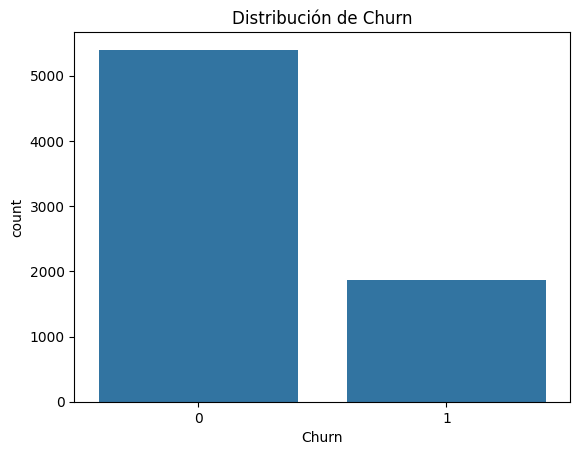

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Proporción de Churn:\n", churn_rate)

sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Distribución después de SMOTE:\n", pd.Series(y_train_res).value_counts())

Distribución después de SMOTE:
 Churn
0    3749
1    3749
Name: count, dtype: int64
